In [49]:
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
%matplotlib inline
import statistics

In [3]:
credit = pd.read_csv('default of credit card clients.csv', header =1)

In [5]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [7]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


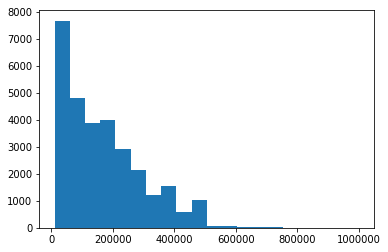

<Figure size 7200x14400 with 0 Axes>

In [17]:
plt.hist(credit['LIMIT_BAL'], bins=20)
plt.figure(figsize=(100,200))
plt.show()

In [ ]:
plt.boxplot(credit['LIMIT_BAL'], 0,'gD')
plt.show()


In [ ]:
x = credit['PAY_0']
y = credit['LIMIT_BAL']
plt.scatter(x,y)
plt.show()

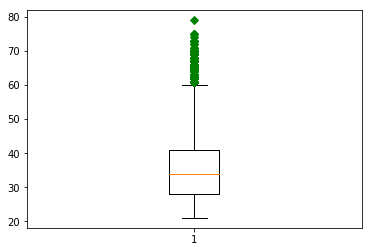

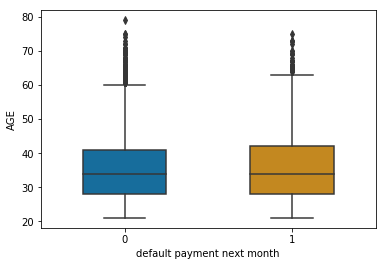

In [28]:
A = credit['AGE']
plt.boxplot(A,0,'gD')
plt.show()
# A seaborn plot with default category
bplot = sns.boxplot(x='default payment next month', y='AGE', 
                 data=credit, 
                 width=0.5,
                 palette="colorblind")

In [22]:
corrMat = credit.corr()
print(corrMat)

                                  ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026179  0.018497   0.039177   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.219161   
SEX                         0.018497   0.024755  1.000000   0.014232   
EDUCATION                   0.039177  -0.219161  0.014232   1.000000   
MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.143464   
AGE                         0.018678   0.144713 -0.090874   0.175061   
PAY_0                      -0.030575  -0.271214 -0.057643   0.105364   
PAY_2                      -0.011215  -0.296382 -0.070771   0.121566   
PAY_3                      -0.018494  -0.286123 -0.066096   0.114025   
PAY_4                      -0.002735  -0.267460 -0.060173   0.108793   
PAY_5                      -0.022199  -0.249411 -0.055064   0.097520   
PAY_6                      -0.020270  -0.235195 -0.044008   0.082316   
BILL_AMT1                   0.019389   0.285430 -0.033642   0.02

In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [16]:
#The ID column is  just a row number column and so we will drop it.
CleanData = data = credit.drop(columns="ID")

In [26]:
# convert the 'default payment next month', and other categorical variables to categorical type
CleanData['default payment next month'] = CleanData['default payment next month'].astype('category',copy=False)
CleanData['SEX'] = CleanData['SEX'].astype('category',copy=False)
CleanData['EDUCATION'] = CleanData['EDUCATION'].astype('category',copy=False)
CleanData['MARRIAGE'] = CleanData['MARRIAGE'].astype('category',copy=False)
print (CleanData['MARRIAGE'].unique())

[1, 2, 3, 0]
Categories (4, int64): [1, 2, 3, 0]


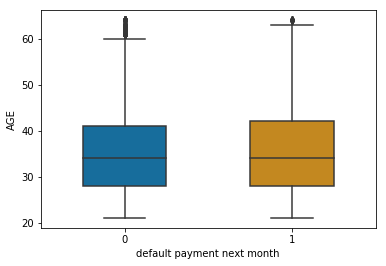

In [37]:
#based on the AGE boxplot grouped by defaulters, we see that the percentage of defaulters over the age of 65 is very low. 
#So we will filter those out
CleanData=CleanData[CleanData.AGE <65]
bplot = sns.boxplot(x='default payment next month', y='AGE', 
                 data=CleanData, 
                 width=0.5,
                 palette="colorblind")

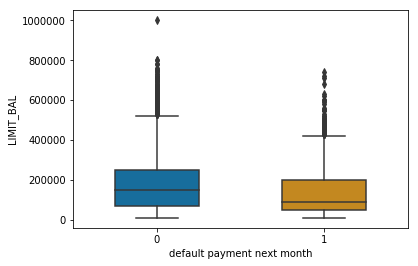

In [38]:
bplot = sns.boxplot(x='default payment next month', y='LIMIT_BAL', 
                 data=CleanData, 
                 width=0.5,
                 palette="colorblind")


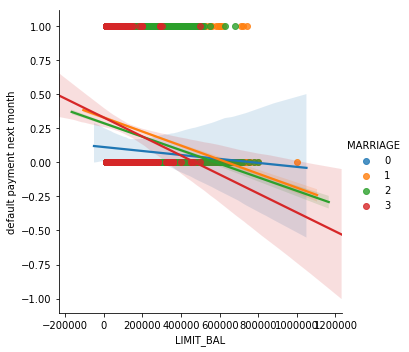

In [82]:
#Customers with a higher Amount of credit (LIMIT_BAL) were less likely to default
sns.lmplot('LIMIT_BAL', 'default payment next month', data=credit, hue='MARRIAGE')

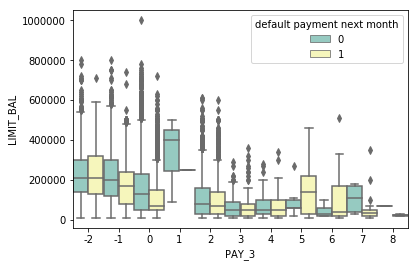

In [71]:
# Customers with a payment delay of multiple months with a high LIMIT_BAL seem to be defaulting more
bplot = sns.boxplot(x='PAY_3', y='LIMIT_BAL',hue ='default payment next month',
                 data=CleanData, 
                 width=1,
                 palette="Set3")

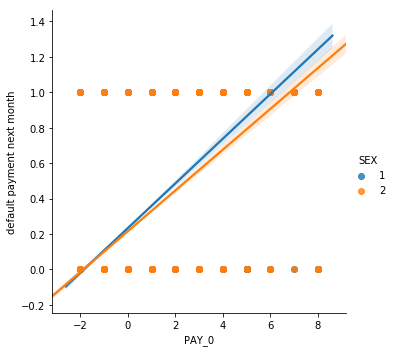

In [70]:
#As the Payment delay in months increases, there is a clear trend towards defaulting
sns.lmplot('PAY_0', 'default payment next month', data=credit, hue='SEX')

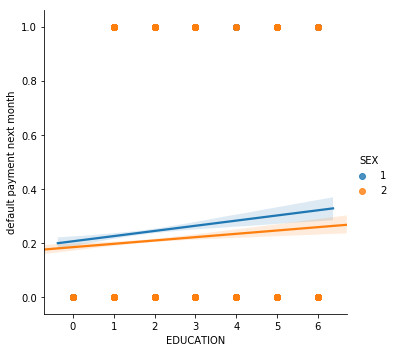

In [78]:
#Highly educated people were slightly less likely to default than lower educated people
sns.lmplot('EDUCATION', 'default payment next month', data=credit, hue='SEX')

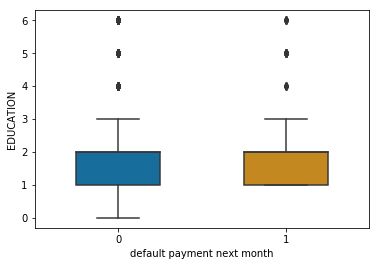

In [73]:
bplot = sns.boxplot(x='default payment next month', y='EDUCATION', 
                 data=credit, 
                 width=0.5,
                 palette="colorblind")

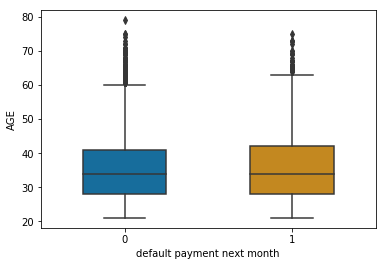

In [87]:
bplot = sns.boxplot(x='default payment next month', y='AGE',
                 data=credit, 
                    width =0.5,
                    palette='colorblind'
                 )

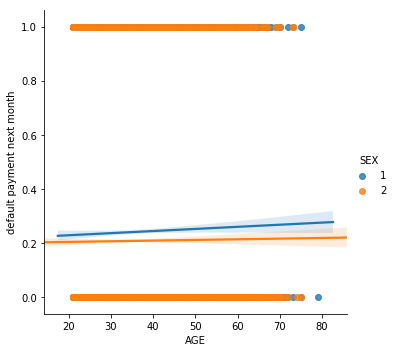

In [83]:
#defaulting trend remained the same within all ages. Most defaulters between 25 and 45 years old
sns.lmplot('AGE', 'default payment next month', data=credit, hue='SEX')